In [12]:
#pip install scikit-learn
! pip install pandas


  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import  fetch_openml


In [ ]:
# Load MNIST dataset (70000 images of 28x28 pixels)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)

print("Data shape:", X.shape)


Data shape: (70000, 784)


In [17]:
# normalize and mean ceter
x/=255.0


x_mean= np.mean(x,axis=0)
x_centred= x-x_mean

# compute covarience matrix

cov_matrix= np.cov(x_centred,rowvar=False)
print("Covarience matrix shape",cov_matrix.shape)

# eigen value and eigen vector

eigen_val,eigen_vec= np.linalg.eigh(cov_matrix)

# sort the larges eigen value 
idx= np.argsort(eigen_val)[::-1]
eigen_val=eigen_val[idx]
eigen_vec=eigen_vec[:,idx]


# we keep k=100 principle componnet 
k=100
w= eigen_vec[:,:k]

x_pca= x_centred @ w
print("Reduced shape of date",x_pca.shape)




Covarience matrix shape (784, 784)
Reduced shape of date (70000, 100)


KeyError: 0

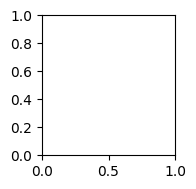

In [24]:
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(x[i].reshape(28, 28), cmap='gray')   # ← fixed
    plt.axis('off')
    # Reconstructed
    plt.subplot(2, n, i+1+n)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')   # ← fixed
    plt.axis('off')

plt.suptitle(f"PCA Reconstruction with k={k} Components")
plt.show()
